In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cufflinks as cf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib

In [20]:
cf.go_offline()

In [21]:
%matplotlib inline

## Reading Data

In [22]:
data = pd.read_csv('CO2.csv')

In [23]:
data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [24]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [25]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [26]:
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Features Selection

In [27]:
co2_df = data.drop(['MAKE','MODELYEAR','MODEL','VEHICLECLASS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'TRANSMISSION','FUELTYPE','FUELCONSUMPTION_COMB_MPG'], axis=1)

In [28]:
co2_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [29]:
co2_df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [30]:
co2_df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [31]:
co2_df.shape

(1067, 4)

## Find a Feature's Relation

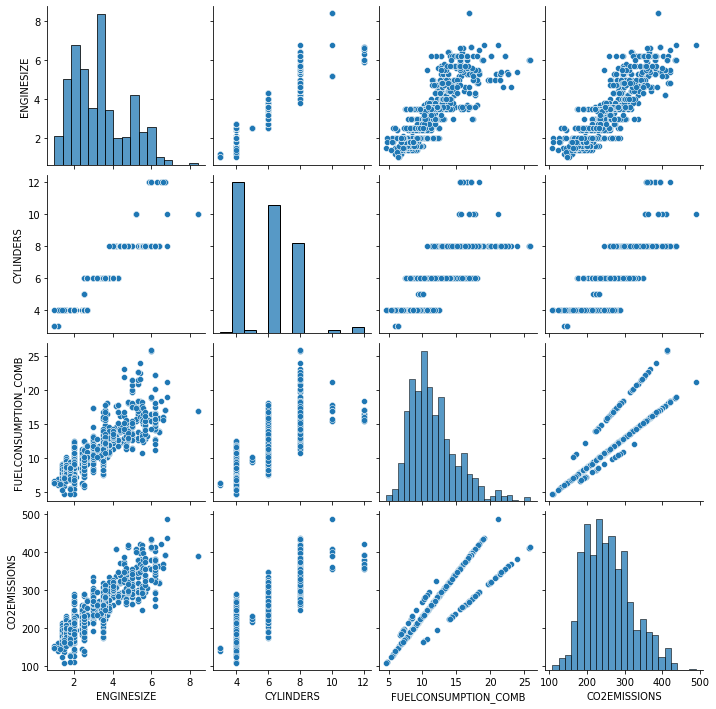

In [32]:
sns.pairplot(co2_df)

## Correlation

<AxesSubplot:>

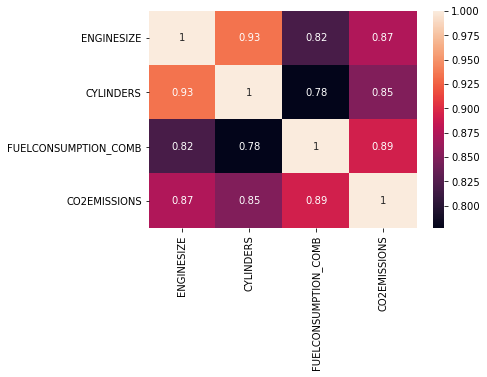

In [33]:
sns.heatmap(co2_df.corr(), annot=True)

## Looking for Null Values

<AxesSubplot:>

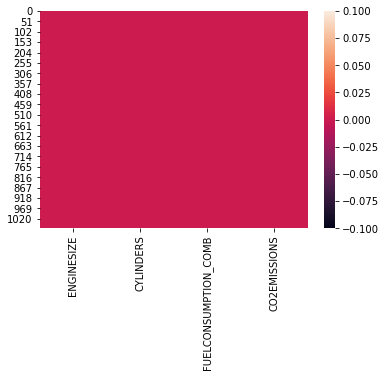

In [34]:
sns.heatmap(co2_df.isnull())

# Data Visualization

In [35]:
co2_df['ENGINESIZE'].iplot(kind='hist',yTitle= 'No.', xTitle='Engine Size' ,title='Engine Size Distribution', bins=20)

In [36]:
7 + 108 + 197 + 128 + 84 + 227 + 44 + 57 + 55 + 92 + 50 + 14 + 2 + 2

1067

In [37]:
co2_df['ENGINESIZE'].iplot(kind='box', title='Engine Size Mean')

In [38]:
co2_df['CO2EMISSIONS'].iplot(kind='hist', bins=30, xTitle='CO2 PPM', yTitle='No.', title='CO2 Canada Vehicles Emissions Parts-Per-Millions January/2019')

## Getting into ML

In [39]:
co2_df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

# Independent Value

In [40]:
x = np.asanyarray(co2_df[['ENGINESIZE']])
x

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

# Target Value

In [41]:
y = np.asanyarray(co2_df[['CO2EMISSIONS']])
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

# Data Split & Linear Model

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [43]:
model = LinearRegression()

In [44]:
model.fit(x_train, y_train)

LinearRegression()

In [45]:
b = model.intercept_
b

array([126.28970217])

In [46]:
m = model.coef_
m

array([[38.99297872]])

## Predictions

In [47]:
y_predict = model.predict(x_test)

# Performance

In [48]:
100*(r2_score(y_test, y_predict))

76.15595731934374

# Plotting 

Text(0, 0.5, 'CO2')

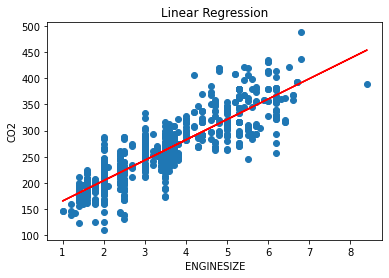

In [50]:
plt.scatter(x_train, y_train)
plt.plot(x_train, b + m*x_train, 'r')
plt.title('Linear Regression')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2')

# Example

In [51]:
co2_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [52]:
model.predict([[2.1]])

array([[208.1749575]])

In [53]:
model.predict([[2.2]])

array([[212.07425537]])

In [54]:
model.predict([[2.3]])

array([[215.97355324]])

In [55]:
model.predict([[2.4]])

array([[219.87285111]])

# Export the model

In [60]:
joblib.dump(model, 'reg_model.joblib')

['reg_model.joblib']